**SUBMITTED BY:**
**AAKASH MITTAL**

Source: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

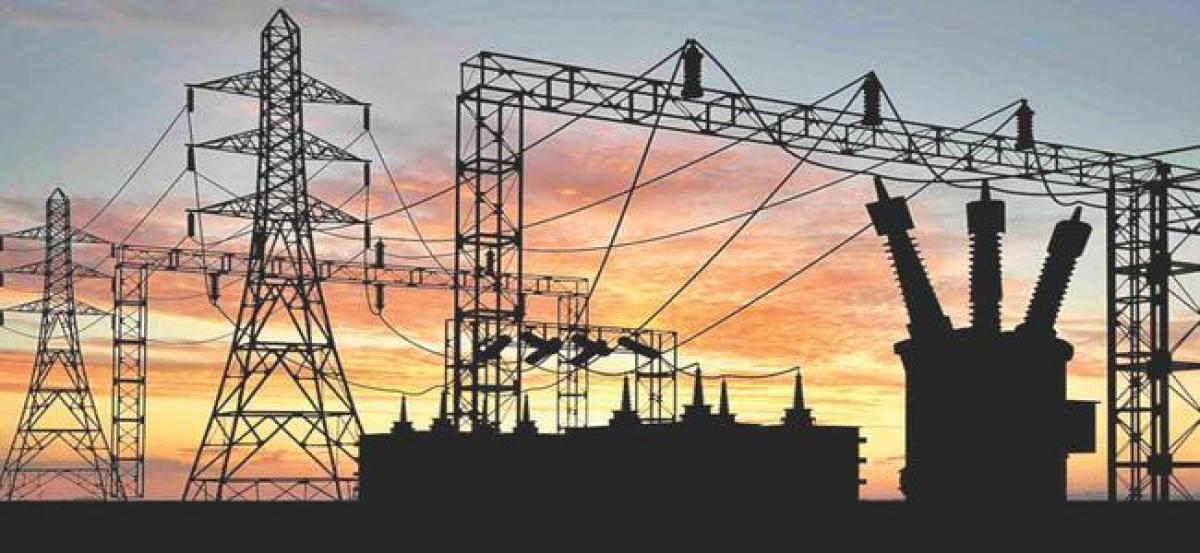

# Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes:
- 1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
- 2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

# Attribute Information

- 1.date: Date in format dd/mm/yyyy
- 2.time: time in format hh:mm:ss
- 3.global_active_power: household global minute-averaged active power (in kilowatt)
- 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)
- 5.voltage: minute-averaged voltage (in volt)
- 6.global_intensity: household global minute-averaged current intensity (in ampere)
- 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
- 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a - washing-machine, a tumble-drier, a refrigerator and a light.
- 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

# Profiling of the Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("household_power_consumption.txt", sep=';')

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(2075259, 9)

In [7]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [8]:
# returns a list of columns using logic; list comprehension
[feature for feature in df.columns]

['Date',
 'Time',
 'Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [10]:
df.isnull().sum()
#determine whether any column has null values

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [11]:
df.memory_usage()

Index                         128
Date                     16602072
Time                     16602072
Global_active_power      16602072
Global_reactive_power    16602072
Voltage                  16602072
Global_intensity         16602072
Sub_metering_1           16602072
Sub_metering_2           16602072
Sub_metering_3           16602072
dtype: int64

In [12]:
df.nunique()
#unique entities of each column

Date                     1442
Time                     1440
Global_active_power      6534
Global_reactive_power     896
Voltage                  5168
Global_intensity          377
Sub_metering_1            153
Sub_metering_2            145
Sub_metering_3             32
dtype: int64

In [13]:
df.duplicated().sum()
#no duplicate value is present inside the dataset

0

In [14]:
# Using + operator to combine two columns: region_of_employment + continent = emp_region
df["Date_&_Time"] = df['Date'].astype(str) +", "+ df["Time"]
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_&_Time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,"16/12/2006, 17:24:00"
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,"16/12/2006, 17:25:00"
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,"16/12/2006, 17:26:00"
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,"16/12/2006, 17:27:00"
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,"16/12/2006, 17:28:00"
...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,"26/11/2010, 20:58:00"
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0,"26/11/2010, 20:59:00"
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,"26/11/2010, 21:00:00"
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0,"26/11/2010, 21:01:00"


In [15]:
df.loc[2:3]
#return 2nd and 3rd row

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_&_Time
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,"16/12/2006, 17:26:00"
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,"16/12/2006, 17:27:00"


In [16]:
df.iloc[2:3]
#only returns 2nd row

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_&_Time
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,"16/12/2006, 17:26:00"


In [17]:
df.iloc[1:5, 2:]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_&_Time
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,"16/12/2006, 17:25:00"
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,"16/12/2006, 17:26:00"
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,"16/12/2006, 17:27:00"
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,"16/12/2006, 17:28:00"


-------------------------------xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx---------------------------------------

# Data Cleanning

In [18]:
dfc = df.copy()
dfc.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_&_Time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,"16/12/2006, 17:24:00"
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,"16/12/2006, 17:25:00"
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,"16/12/2006, 17:26:00"
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,"16/12/2006, 17:27:00"
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,"16/12/2006, 17:28:00"


In [19]:
dfc.drop(['Date', 'Time'], axis=1, inplace=True)

**REPLACING NULL VALUES WITH MEDIAN**

In [20]:
dfc.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
Date_&_Time                  0
dtype: int64

In [21]:
dfc['Sub_metering_3'] = dfc['Sub_metering_3'].fillna(dfc['Sub_metering_3'].median())

In [22]:
dfc.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Date_&_Time              0
dtype: int64

**Observation**
- Now we don't have any null value inside the dataset

In [23]:
# Stripping the names of the columns

dfc.columns = [i.strip() for i in dfc.columns]
dfc.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Date_&_Time'],
      dtype='object')

**Replacing Irrelevant value('?') present in each column with median**

In [24]:
Global_active_power_ir_value = dfc[dfc['Global_active_power'] == '?']

In [25]:
Global_active_power_ir_value 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_&_Time
6839,?,?,?,?,?,?,1.0,"21/12/2006, 11:23:00"
6840,?,?,?,?,?,?,1.0,"21/12/2006, 11:24:00"
19724,?,?,?,?,?,?,1.0,"30/12/2006, 10:08:00"
19725,?,?,?,?,?,?,1.0,"30/12/2006, 10:09:00"
41832,?,?,?,?,?,?,1.0,"14/1/2007, 18:36:00"
...,...,...,...,...,...,...,...,...
1990185,?,?,?,?,?,?,1.0,"28/9/2010, 19:09:00"
1990186,?,?,?,?,?,?,1.0,"28/9/2010, 19:10:00"
1990187,?,?,?,?,?,?,1.0,"28/9/2010, 19:11:00"
1990188,?,?,?,?,?,?,1.0,"28/9/2010, 19:12:00"


In [26]:
#First Replace '?' with int value let's take 0
dfc['Global_active_power'] = dfc['Global_active_power'].replace(['?'], 0)
dfc['Global_reactive_power'] = dfc['Global_reactive_power'].replace(['?'], 0)
dfc['Voltage'] = dfc['Voltage'].replace(['?'], 0)
dfc['Global_intensity'] = dfc['Global_intensity'].replace(['?'], 0)
dfc['Sub_metering_1'] = dfc['Sub_metering_1'].replace(['?'], 0)
dfc['Sub_metering_2'] = dfc['Sub_metering_1'].replace(['?'], 0)

In [27]:
dfc[dfc['Global_reactive_power'] =='?']
#Hence no '?' value is present as it is replaced with int 0

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_&_Time


In [28]:
#here we are checking the replaced value with 'int 0'
dfc[dfc['Global_reactive_power'] == 0]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_&_Time
6839,0,0,0,0,0,0,1.0,"21/12/2006, 11:23:00"
6840,0,0,0,0,0,0,1.0,"21/12/2006, 11:24:00"
19724,0,0,0,0,0,0,1.0,"30/12/2006, 10:08:00"
19725,0,0,0,0,0,0,1.0,"30/12/2006, 10:09:00"
41832,0,0,0,0,0,0,1.0,"14/1/2007, 18:36:00"
...,...,...,...,...,...,...,...,...
2075254,0.946,0.0,240.43,4.0,0.0,0.0,0.0,"26/11/2010, 20:58:00"
2075255,0.944,0.0,240.0,4.0,0.0,0.0,0.0,"26/11/2010, 20:59:00"
2075256,0.938,0.0,239.82,3.8,0.0,0.0,0.0,"26/11/2010, 21:00:00"
2075257,0.934,0.0,239.7,3.8,0.0,0.0,0.0,"26/11/2010, 21:01:00"


In [29]:
# evaluating median from columns to replace 'int 0' with median
dfc[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2']].median()

Global_active_power        0.578
Global_reactive_power      0.100
Voltage                  240.960
Global_intensity           2.600
Sub_metering_1             0.000
Sub_metering_2             0.000
dtype: float64

In [30]:
#Replacing value with median
dfc['Global_active_power'] = dfc['Global_active_power'].replace(0, 0.578)
dfc['Global_reactive_power'] = dfc['Global_reactive_power'].replace(0, 0.123)
dfc['Voltage'] = dfc['Voltage'].replace(0, 240.960)
dfc['Global_intensity'] = dfc['Global_intensity'].replace(0, 2.600)
dfc['Sub_metering_1'] = dfc['Sub_metering_1'].replace(0, 0.000)
dfc['Sub_metering_2'] = dfc['Sub_metering_1'].replace(0, 0.000)

In [31]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
 7   Date_&_Time            object 
dtypes: float64(1), object(7)
memory usage: 126.7+ MB


In [32]:
# Changing The DataTypes of the Columns

dfc['Global_active_power'] = dfc['Global_active_power'].astype(float)
dfc['Global_reactive_power']=dfc['Global_reactive_power'].astype(float)
dfc['Voltage']=dfc['Voltage'].astype(float)
dfc['Global_intensity']=dfc['Global_intensity'].astype(float)
dfc['Sub_metering_1']=dfc['Sub_metering_1'].astype(float)
dfc['Sub_metering_2']=dfc['Sub_metering_2'].astype(float)
dfc['Sub_metering_3']=dfc['Sub_metering_3'].astype(float)

In [33]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Date_&_Time            object 
dtypes: float64(7), object(1)
memory usage: 126.7+ MB


**Observation**
- Now we are able to convert the datatype of columns from object to float

# **Finding Outliers**

** finding outlier in voltage column using "5 Number Summary" based on 'prevailing_wage' **

In [34]:
#find quartile_1(q1), quartile_3, where q1 & q3 are 25 and 75 percentile respectively
q1, q3 = np.percentile(dfc['Voltage'],[25,75])
print(f"Value of q1 is: {q1}  and  value of q3 is: {q3}")

Value of q1 is: 239.02  and  value of q3 is: 242.86


In [35]:
# Inter Quartile Range
IQR = q3-q1
IQR

3.8400000000000034

In [36]:
lower_fence = q1-1.5*(IQR)
upper_fence = q3+1.5*(IQR)
print(f"Value of Lower fence is: {lower_fence}  and  value of Upper fence is: {upper_fence}")

Value of Lower fence is: 233.26  and  value of Upper fence is: 248.62


**Observation**
It implies value below '233.6' and value above '248.62' are outliers in Voltage Column.

In [37]:
#creating function
import numpy as np

def remove_outliers(dfc,colum):
    percentile_25 = np.percentile(dfc[colum],25)
    percentile_75 = np.percentile(dfc[colum],75)
    IQR = percentile_75 - percentile_25
    lower_fence = percentile_25 - 1.5*IQR
    higher_fence = percentile_75 + 1.5*IQR
    print("IQR:",IQR)
    print(f"Lower Fence [{colum}]:",lower_fence)
    print(f"Upper Fence [{colum}]:",higher_fence)
    print("_____________________________________________")
    df.loc[dfc[colum]<=lower_fence,colum] = lower_fence
    df.loc[dfc[colum]>=higher_fence,colum] = higher_fence

In [38]:
for colum in dfc.columns:
    remove_outliers(dfc,colum)
import warnings
warnings.filterwarnings('ignore')

IQR: 1.21
Lower Fence [Global_active_power]: -1.505
Upper Fence [Global_active_power]: 3.335
_____________________________________________
IQR: 0.14200000000000002
Lower Fence [Global_reactive_power]: -0.16300000000000003
Upper Fence [Global_reactive_power]: 0.405
_____________________________________________
IQR: 3.8400000000000034
Lower Fence [Voltage]: 233.26
Upper Fence [Voltage]: 248.62
_____________________________________________
IQR: 5.0
Lower Fence [Global_intensity]: -6.1
Upper Fence [Global_intensity]: 13.9
_____________________________________________
IQR: 0.0
Lower Fence [Sub_metering_1]: 0.0
Upper Fence [Sub_metering_1]: 0.0
_____________________________________________
IQR: 0.0
Lower Fence [Sub_metering_2]: 0.0
Upper Fence [Sub_metering_2]: 0.0
_____________________________________________
IQR: 17.0
Lower Fence [Sub_metering_3]: -25.5
Upper Fence [Sub_metering_3]: 42.5
_____________________________________________


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U19'), dtype('<U19')) -> None

# Box Plot: to find outliers

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

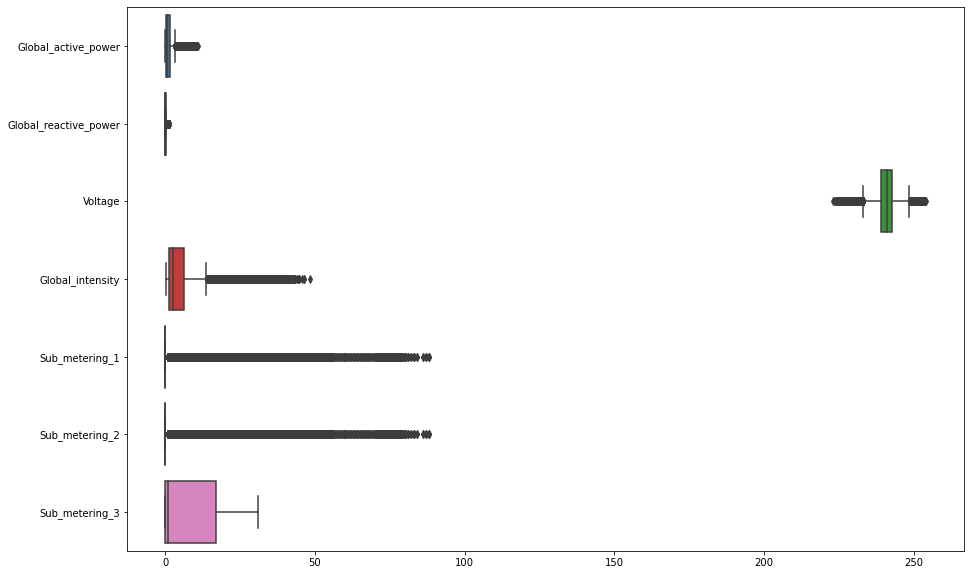

In [40]:
plt.figure(figsize = (15,10))
sns.boxplot(data = dfc,orient="h");

**Observation**
- Global_active_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2 has more outliers.

In [41]:
numerical_features = [feature for feature in dfc.columns if dfc[feature].dtype != 'O']

# Print Numerical Features
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))

We have 7 numerical features : ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


# KDE Plot

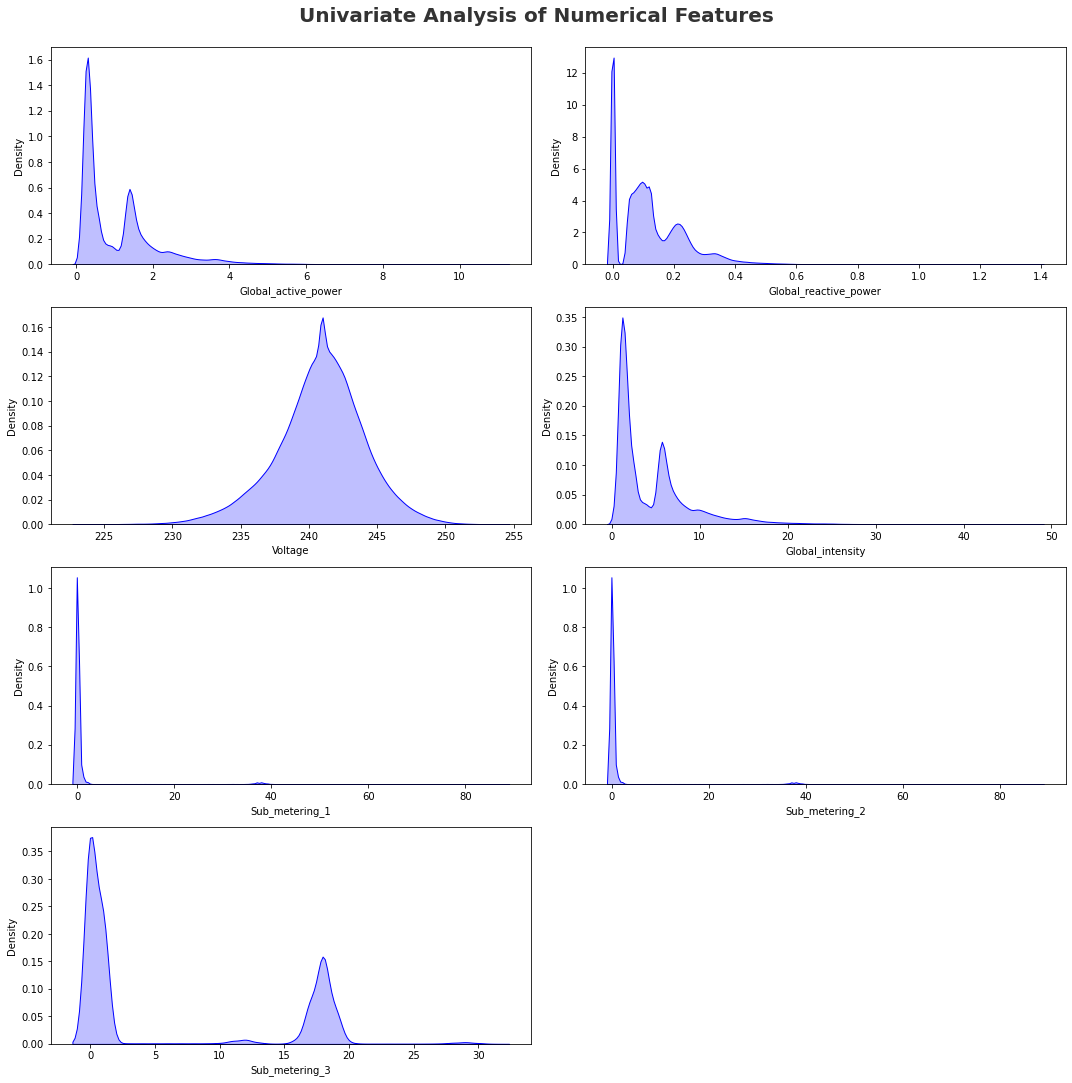

In [45]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=dfc[numerical_features[i]],shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

**Observations**
- Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3 are Left skewed and have Outliers

# Frequency (Range) of each feature

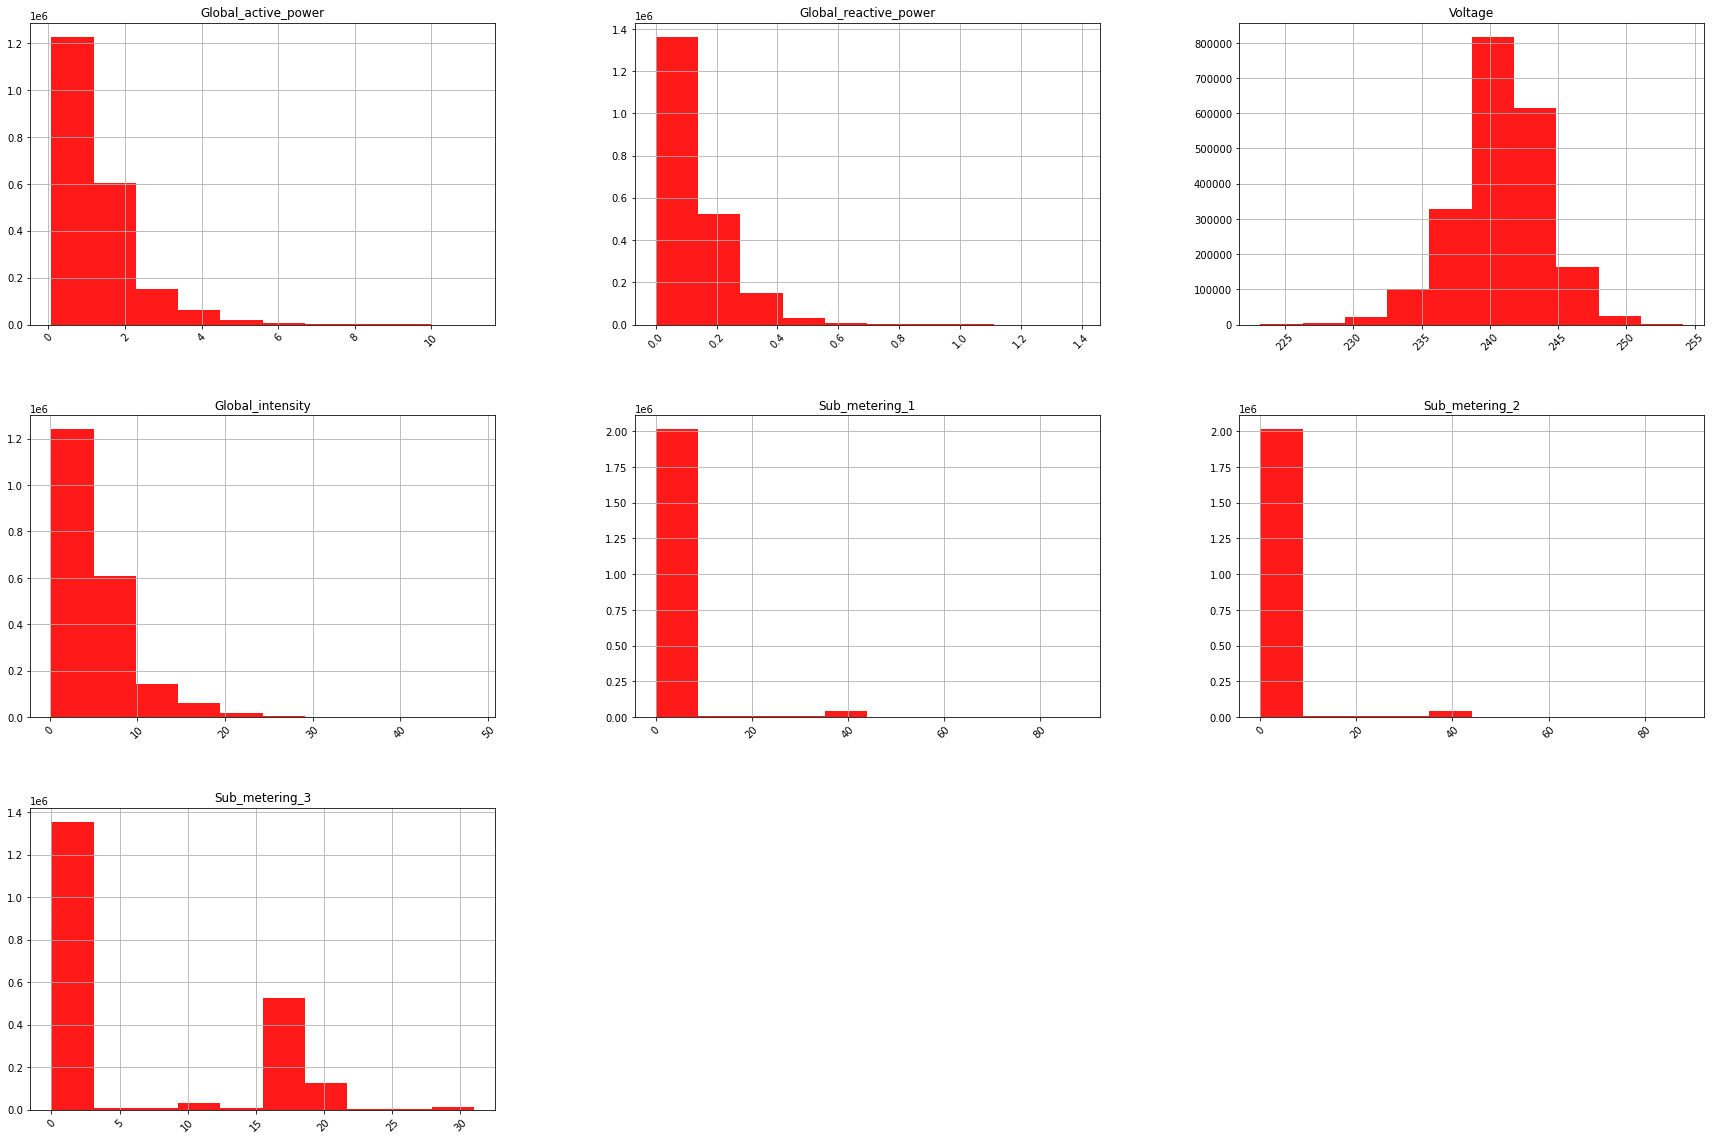

In [46]:
#to construct histograms for all columns
dfc.hist(figsize = (30,20), color='r', xrot = 45, alpha=0.9);

# Statistical Analysis

In [47]:
dfc.describe(include='all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_&_Time
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2075259
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2075259
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"16/12/2006, 17:24:00"
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,1.085185e+00,1.242256e-01,2.408414e+02,4.602375e+00,1.107879e+00,1.107879e+00,6.390116e+00,NaN
std,1.052206e+00,1.117238e-01,3.219671e+00,4.422241e+00,6.115669e+00,6.115669e+00,8.406114e+00,NaN
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,3.100000e-01,5.000000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,5.780000e-01,1.020000e-01,2.409600e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,0.000000e+00,1.700000e+01,NaN


**Observation**

- df.describe() return all Statistics Summary of Numeric Columns.
- Its Return function like:- count(), mean(), std(), min(), 25%(), 50%(), 75%(), max().

**"Covariance shows you how the two variables differ, whereas correlation shows you how the two variables are related"**

In [48]:
#covariance
dfc.cov()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.107138,0.029063,-1.353051,4.647927,3.118977,3.118977,5.659616
Global_reactive_power,0.029063,0.012482,-0.040177,0.131583,0.084246,0.084246,0.083954
Voltage,-1.353051,-0.040177,10.366280,-5.852398,-3.859675,-3.859675,-7.247160
Global_intensity,4.647927,0.131583,-5.852398,19.556215,13.241216,13.241216,23.336849
Sub_metering_1,3.118977,0.084246,-3.859675,13.241216,37.401406,37.401406,5.333925
Sub_metering_2,3.118977,0.084246,-3.859675,13.241216,37.401406,37.401406,5.333925
Sub_metering_3,5.659616,0.083954,-7.247160,23.336849,5.333925,5.333925,70.662747


In [49]:
#corelation
dfc.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247227,-0.399394,0.998886,0.484694,0.484694,0.639869
Global_reactive_power,0.247227,1.000000,-0.111690,0.266324,0.123299,0.123299,0.089393
Voltage,-0.399394,-0.111690,1.000000,-0.411036,-0.196018,-0.196018,-0.267770
Global_intensity,0.998886,0.266324,-0.411036,1.000000,0.489600,0.489600,0.627776
Sub_metering_1,0.484694,0.123299,-0.196018,0.489600,1.000000,1.000000,0.103755
Sub_metering_2,0.484694,0.123299,-0.196018,0.489600,1.000000,1.000000,0.103755
Sub_metering_3,0.639869,0.089393,-0.267770,0.627776,0.103755,0.103755,1.000000


In [50]:
import warnings
warnings.filterwarnings('ignore')

dfc.skew()
#negative sign shows left Skew

Global_active_power      1.806460
Global_reactive_power    1.271831
Voltage                 -0.330121
Global_intensity         1.869548
Sub_metering_1           5.985182
Sub_metering_2           5.985182
Sub_metering_3           0.744532
dtype: float64

# Heat Map

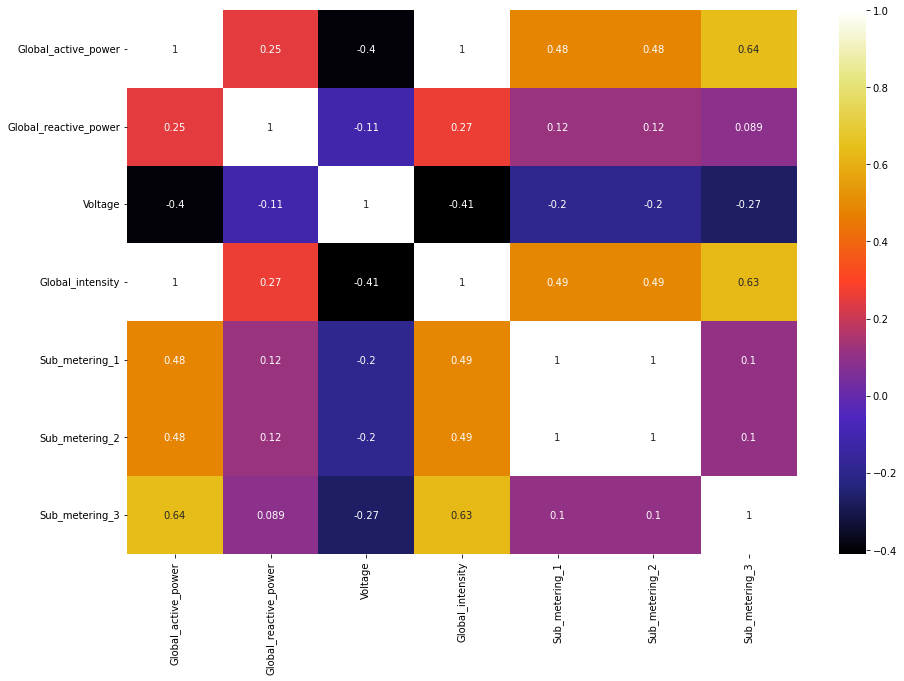

In [51]:
plt.figure(figsize = (15,10))
sns.heatmap(dfc.corr(), cmap="CMRmap", annot=True)
plt.show()

In [ ]:
observation -

Highly +ve correlated features.
Highly -ve correlated features.

Great!! Let's proceed by checking multicollinearity in the variables. Before that, we should scale our data. Let's use the standard scaler for that.

In [52]:
dfc.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_&_Time
0,4.216,0.418,234.84,18.4,0.0,0.0,17.0,"16/12/2006, 17:24:00"
1,5.360,0.436,233.63,23.0,0.0,0.0,16.0,"16/12/2006, 17:25:00"


In [60]:
X = dfc.drop(columns = ['Date_&_Time', 'Global_active_power'])
y = dfc['Global_active_power']

In [61]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 2.62947003, -1.86396806,  3.12005354, -0.18115416, -0.18115416,
         1.26216309],
       [ 2.79058163, -2.23978298,  4.1602504 , -0.18115416, -0.18115416,
         1.14320203],
       [ 3.34552159, -2.34538387,  4.1602504 , -0.18115416, -0.18115416,
         1.26216309],
       ...,
       [-0.01097012, -0.31722567, -0.18144084, -0.18115416, -0.18115416,
        -0.76017502],
       [-0.01097012, -0.35449657, -0.18144084, -0.18115416, -0.18115416,
        -0.76017502],
       [-0.01097012, -0.4010852 , -0.18144084, -0.18115416, -0.18115416,
        -0.76017502]])

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

Multicollinearity describes the state where the independent variables used in a study exhibit a strong relationship with each other.

In [62]:
#Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.0,Global_reactive_power
1,1.0,Voltage
2,1.0,Global_intensity
3,1.0,Sub_metering_1
4,1.0,Sub_metering_2
5,1.0,Sub_metering_3


**Observation- a VIF above 10 indicates high correlation and is cause for concern**
- All the VIF values are less than 5 and are very low. That means no multicollinearity. 
Now, we can go ahead with fitting our data to the model.

**Thank You**